<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/spectral/fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulate AR process

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("whitegrid", {"ax.grids": False})

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# AR process plotter

def ar_simulator(alpha, k, N, x):
  for i in range(k,N):
    x[i] = sum(alpha*x[i-k:i]) + np.random.randn()
  x += np.sin(np.linspace(0,10 * np.pi, N))

  plt.plot(x)
  plt.xlabel("X axis")
  plt.title("AR(%s) process"%k)
  plt.show()

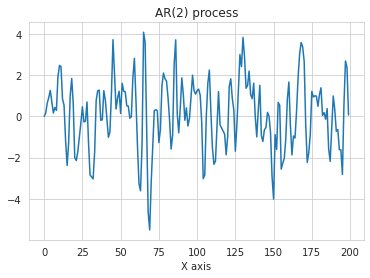

In [3]:
alpha = np.array([-.6,.9])
k = len(alpha)
N = 200
x = np.zeros(N)

ar_process = ar_simulator(alpha,k,N,x)

# Fourier transform

In [4]:
# Manual FT 

def notsofast_ft(N,x):
  t = np.arange(N)/N
  fc = np.zeros(N,dtype=complex)
  for f in range(N):
    csw = np.exp(-1j*2*np.pi*f*t)
    fc[f] = np.dot(csw,x)
  return fc

# Fourier plotter

def plot_ft(N,ft):
  hz = np.linspace(0,1,int(N/2+1))
  plt.plot(hz,np.abs(ft[:len(hz)]),label="Fourier Transform")
  plt.xlabel("Frequency (fraction of Nyquist")
  plt.ylabel("Amplitude (-)")
  plt.legend()
  plt.show()

def does_my_fourier_work(N,ft,ft2):
  hz = np.linspace(0,1,int(N/2+1))
  plt.plot(hz,np.abs(ft[:len(hz)]),label="Manual FT")
  plt.plot(hz, np.abs(ft2[:len(hz)]), "ro", label="FFT")
  plt.xlabel("Frequency (fraction of Nyquist")
  plt.ylabel("Amplitude (-)")
  plt.legend()
  plt.show()

In [5]:
fourier = notsofast_ft(N,x)
fourier2 = np.fft.fft(x)

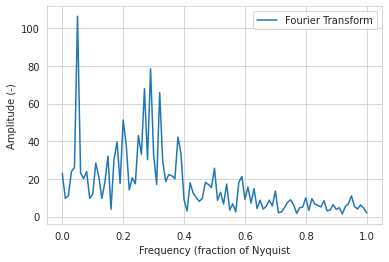

In [6]:
ft1 = plot_ft(N,fourier)

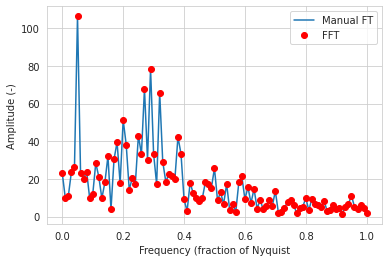

In [7]:
ft_compare = does_my_fourier_work(N, fourier, fourier2)

# Zero-padding

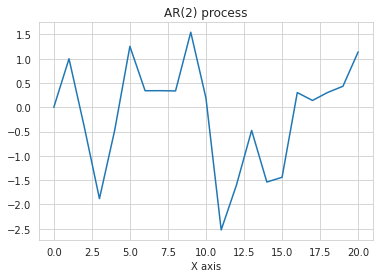

In [8]:
alpha = np.array([-.6,.9])
k = len(alpha)
N = 21
x = np.zeros(N)

ar_2 = ar_simulator(alpha,k,N,x)

In [9]:
# Zero-padding

def zero_padding(N, ran, x):

  for i in range(ran):

    nfft = int(N) + 10**i * int(i!=0)
    xX = np.fft.fft(x, n=nfft)
    hz = np.linspace(0,1,int(nfft/2+1))

    plt.plot(hz,np.abs(xX[:len(hz)]),".-", label = "%s-point FT"%nfft)
  
  plt.legend()
  plt.show()

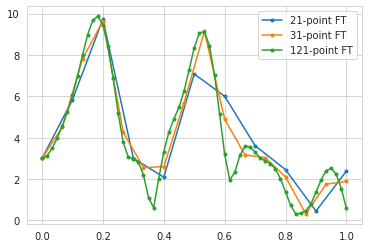

In [10]:
ft_pad = zero_padding(N, 3, x)

# Welch's method

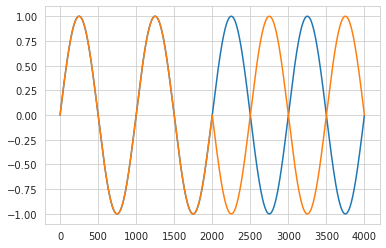

In [15]:
N = 2000
t = np.linspace(0,4*np.pi,N)

signal1 = np.concatenate((np.sin(t), np.sin(t)))
signal2 = np.concatenate((np.sin(t), -np.sin(t)))

plt.plot(signal1)
plt.plot(signal2)
plt.show()

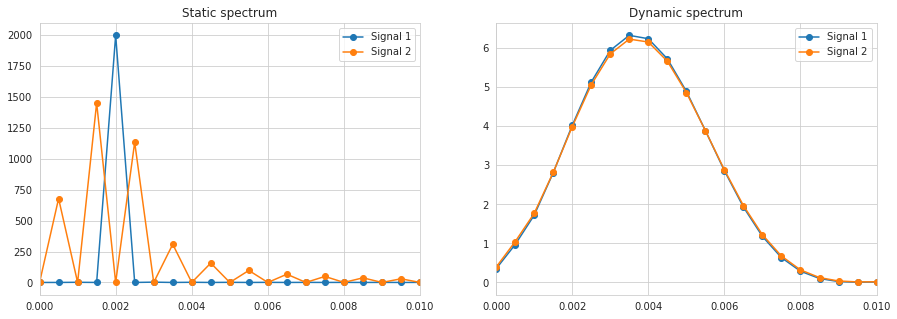

In [22]:
from scipy.signal import welch

# Static FFT

staticX1 = np.fft.fft(signal1)
staticX2 = np.fft.fft(signal2)

staticHz = np.linspace(0,1,int(len(signal1)/2+1))

# Dynamic FFT (Welch's method)

dynamicHz,dynamicX1 = welch(signal1,nfft=N)
dynamicHz,dynamicX2 = welch(signal2,nfft=N)


fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(staticHz, np.abs(staticX1[:len(staticHz)]), "-o", label="Signal 1")
ax[0].plot(staticHz, np.abs(staticX2[:len(staticHz)]), "-o", label="Signal 2")
ax[0].set_xlim([0,.01])
ax[0].set_title("Static spectrum")
ax[0].legend()

ax[1].plot(dynamicHz, np.abs(dynamicX1[:len(dynamicHz)]), "-o", label="Signal 1")
ax[1].plot(dynamicHz, np.abs(dynamicX2[:len(dynamicHz)]), "-o", label="Signal 2")
ax[1].set_xlim([0,.01])
ax[1].set_title("Dynamic spectrum")
ax[1].legend()

plt.show()

# Spectrogram

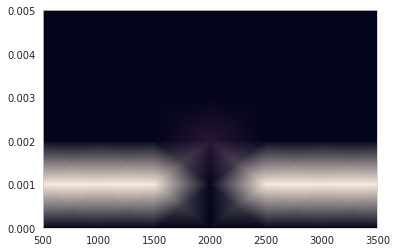

In [32]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(signal2, noverlap=500,nperseg=1000)

plt.pcolormesh(t,f,Sxx, shading="gouraud")
plt.ylim([0,.005])
plt.show()